In [2]:
import pandas as pd
import numpy as np
import statistics as sts

In [11]:
#Importação e primeira análise

df = pd.read_csv('agricultural_raw_material.csv')
df.head()


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [76]:
#renomear as colunas
df.columns = ["Mes", "Lã Grossa Preço", "Lã Grossa Variação", "COPRA Preço", "COPRA Variação", "Algodão Preço", "Algodão Variação", "Lã Fina Preço", "Lã Fina Variação", "Madeira Dura Preço", "Madeira Dura Variação", "Madeira Serrada Preço", "Madeira Serrada Variação","Pele Preço", "Pele Variação", "Madeira Compensada Preço", "Madeira Compensada Variação", "Borracha Preço", "Borracha Variação", "SOFTLOG Preço", "SOFTLOG Variação", "Madeira Macia Serrada Preço", "Madeira Macia Serrada Variação", "Polpa de Celulose Preço", "Polpa de Celulose Variação"]

ValueError: Length mismatch: Expected axis has 24 elements, new values have 25 elements

In [17]:
#Remover Caracteres que dificultam o tratamento de dados

df = df.replace('%','',regex=True)
df = df.replace(',','',regex=True)
df = df.replace('-','',regex=True)
df = df.replace('',np.nan)
df = df.replace ('MAY90', np.nan)


In [77]:
#Convertendo para Float

df.head()
lst = ["Lã Grossa Preço", "Lã Grossa Variação", "COPRA Preço", "COPRA Variação", "Algodão Preço", "Algodão Variação", "Lã Fina Preço", "Lã Fina Variação", "Madeira Dura Preço", "Madeira Dura Variação", "Madeira Serrada Preço", "Madeira Serrada Variação","Pele Preço", "Pele Variação", "Madeira Compensada Preço", "Madeira Compensada Variação", "Borracha Preço", "Borracha Variação", "SOFTLOG Preço", "SOFTLOG Variação", "Madeira Macia Serrada Preço", "Madeira Macia Serrada Variação", "Polpa de Celulose Preço", "Polpa de Celulose Variação"]
df[lst] = df[lst].astype("float")
df.dtypes

Lã Grossa Preço                   float64
Lã Grossa Variação                float64
COPRA Preço                       float64
COPRA Variação                    float64
Algodão Preço                     float64
Algodão Variação                  float64
Lã Fina Preço                     float64
Lã Fina Variação                  float64
Madeira Dura Preço                float64
Madeira Dura Variação             float64
Madeira Serrada Preço             float64
Madeira Serrada Variação          float64
Pele Preço                        float64
Pele Variação                     float64
Madeira Compensada Preço          float64
Madeira Compensada Variação       float64
Borracha Preço                    float64
Borracha Variação                 float64
SOFTLOG Preço                     float64
SOFTLOG Variação                  float64
Madeira Macia Serrada Preço       float64
Madeira Macia Serrada Variação    float64
Polpa de Celulose Preço           float64
Polpa de Celulose Variação        

In [19]:
#Verificando Valores NUlos
df.isnull().sum()

Mês                                0
Lã Grossa Preço                   34
Lã Grossa Variação                35
COPRA Preço                       22
COPRA Variação                    23
Algodão Preço                      0
Algodão Variação                   1
Lã Fina Preço                     34
Lã Fina Variação                  35
Madeira Dura Preço                 0
Madeira Dura Variação              1
Madeira Serrada Preço             34
Madeira Serrada Variação          35
Pele Preço                        34
Pele Variação                     35
Madeira Compensada Preço           0
Madeira Compensada Variação        1
Borracha Preço                     0
Borracha Variação                  1
SOFTLOG Preço                     34
SOFTLOG Variação                  35
Madeira Macia Serrada Preço       34
Madeira Macia Serrada Variação    35
Polpa de Celulose Preço            1
Polpa de Celulose Variação         2
dtype: int64

In [32]:
df['Lã Grossa Preço'].describe()
df['Lã Grossa Preço'].isnull().sum()

34

In [22]:
#Tratamento da coluna LÃ GROSSA PREÇO pra substituição de nas pela mediana
medianaLGP = sts.median(df['Lã Grossa Preço']) 
df['Lã Grossa Preço'].fillna(medianaLGP,inplace=True)
df['Lã Grossa Preço'].isnull().sum()

0

In [23]:
#Tratamento da coluna LÃ GROSSA Variação pra substituição de nas pela mediana
medianaLGV = sts.median(df['Lã Grossa Variação'])
df['Lã Grossa Variação'].fillna(medianaLGV,inplace=True)
df['Lã Grossa Variação'].isnull().sum()

0

In [24]:
#Tratamento da coluna COPRA Preço pra substituição de nas pela mediana
medianaCP = sts.median(df['COPRA Preço'])
df['COPRA Preço'].fillna(medianaCP,inplace=True)
df['COPRA Preço'].isnull().sum()

0

In [25]:
#Tratamento da coluna COPRA Variaçào pra substituição de nas pela mediana

medianaCV = sts.median(df['COPRA Variação'])
df['COPRA Variação'].fillna(medianaCV,inplace=True)
df['COPRA Variação'].isnull().sum()

0

In [28]:
medianaAV = sts.median(df['Algodão Variação'])
df['Algodão Variação'].fillna(medianaAV, inplace=True)
df['Algodão Variação'].isnull().sum()

0

In [29]:
medianaLFP = sts.median(df['Lã Fina Preço'])
df['Lã Fina Preço'].fillna(medianaLFP,inplace=True)
df['Lã Fina Preço'].isnull().sum()

0

In [30]:
medianaLFV = sts.median(df['Lã Fina Variação'])
df['Lã Fina Variação'].fillna(medianaLFV,inplace=True)
df['Lã Fina Variação'].isnull().sum()

0

In [32]:
medianaMDV = sts.median(df['Madeira Dura Variação'])
df['Madeira Dura Variação'].fillna(medianaMDV,inplace=True)
df['Madeira Dura Variação'].isnull().sum()

0

In [33]:
medianaMSP = sts.median(df['Madeira Serrada Preço'])
df['Madeira Serrada Preço'].fillna(medianaMSP,inplace=True)
df['Madeira Serrada Preço'].isnull().sum()

0

In [35]:
medianaMSV = sts.median(df['Madeira Serrada Variação'])
df['Madeira Serrada Variação'].fillna(medianaMSV, inplace=True)
df['Madeira Serrada Variação'].isnull().sum()

0

In [36]:
medianaPP = sts.median(df['Pele Preço'])
df['Pele Preço'].fillna(medianaPP, inplace=True)
df['Pele Preço'].isnull().sum()

0

In [38]:
medianaPV = sts.median(df['Pele Variação'])
df['Pele Variação'].fillna(medianaPV,inplace=True)
df['Pele Variação'].isnull().sum()

0

In [39]:
medianaMCV = sts.median(df['Madeira Compensada Variação'])
df['Madeira Compensada Variação'].fillna(medianaMCV,inplace=True)
df['Madeira Compensada Variação'].isnull().sum()

0

In [40]:
medianaBV = sts.median(df['Borracha Variação'])
df['Borracha Variação'].fillna(medianaBV, inplace=True)
df['Borracha Variação'].isnull().sum()

0

In [41]:
medianaSP = sts.median(df['SOFTLOG Preço'])
df['SOFTLOG Preço'].fillna(medianaSP, inplace=True)
df['SOFTLOG Preço'].isnull().sum()

0

In [42]:
medianaSV = sts.median(df['SOFTLOG Variação'])
df['SOFTLOG Variação'].fillna(medianaSV, inplace=True)
df['SOFTLOG Variação'].isnull().sum()

0

In [43]:
medianaMMSP = sts.median(df['Madeira Macia Serrada Preço'])
df['Madeira Macia Serrada Preço'].fillna(medianaMMSP,inplace=True)
df['Madeira Macia Serrada Preço'].isnull().sum()

0

In [44]:
medianaMMSV = sts.median(df['Madeira Macia Serrada Variação'])
df['Madeira Macia Serrada Variação'].fillna(medianaMMSV, inplace=True)
df['Madeira Macia Serrada Variação'].isnull().sum()

0

In [46]:
medianaPCP = sts.median(df['Polpa de Celulose Preço'])
df['Polpa de Celulose Preço'].fillna(medianaPCP, inplace=True)
df['Polpa de Celulose Preço'].isnull().sum()

0

In [47]:
medianaPCV = sts.median(df['Polpa de Celulose Variação'])
df['Polpa de Celulose Variação'].fillna(medianaPCV, inplace=True)
df['Polpa de Celulose Variação'].isnull().sum()

0

In [48]:
df.isnull().sum()

Mês                               0
Lã Grossa Preço                   0
Lã Grossa Variação                0
COPRA Preço                       0
COPRA Variação                    0
Algodão Preço                     0
Algodão Variação                  0
Lã Fina Preço                     0
Lã Fina Variação                  0
Madeira Dura Preço                0
Madeira Dura Variação             0
Madeira Serrada Preço             0
Madeira Serrada Variação          0
Pele Preço                        0
Pele Variação                     0
Madeira Compensada Preço          0
Madeira Compensada Variação       0
Borracha Preço                    0
Borracha Variação                 0
SOFTLOG Preço                     0
SOFTLOG Variação                  0
Madeira Macia Serrada Preço       0
Madeira Macia Serrada Variação    0
Polpa de Celulose Preço           0
Polpa de Celulose Variação        0
dtype: int64

In [49]:
df.head()

,Mês,Lã Grossa Preço,Lã Grossa Variação,COPRA Preço,COPRA Variação,Algodão Preço,Algodão Variação,Lã Fina Preço,Lã Fina Variação,Madeira Dura Preço,...,Madeira Compensada Preço,Madeira Compensada Variação,Borracha Preço,Borracha Variação,SOFTLOG Preço,SOFTLOG Variação,Madeira Macia Serrada Preço,Madeira Macia Serrada Variação,Polpa de Celulose Preço,Polpa de Celulose Variação
0,Apr90,482.34,3.26,236.0,4.84,1.83,2.86,1071.63,4.03,161.20,...,312.36,1.40,0.84,4.04,120.66,4.85,218.76,4.07,829.29,1.82
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49


In [59]:
#Formatação do formato de datas da coluna Mes

df.Mes  = pd.to_datetime(df.Mes.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Mes')

In [61]:
df.head()

,Lã Grossa Preço,Lã Grossa Variação,COPRA Preço,COPRA Variação,Algodão Preço,Algodão Variação,Lã Fina Preço,Lã Fina Variação,Madeira Dura Preço,Madeira Dura Variação,...,Madeira Compensada Preço,Madeira Compensada Variação,Borracha Preço,Borracha Variação,SOFTLOG Preço,SOFTLOG Variação,Madeira Macia Serrada Preço,Madeira Macia Serrada Variação,Polpa de Celulose Preço,Polpa de Celulose Variação
Mes,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,3.26,236.0,4.84,1.83,2.86,1071.63,4.03,161.20,2.16,...,312.36,1.40,0.84,4.04,120.66,4.85,218.76,4.07,829.29,1.82
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49


In [100]:
#importando e configurando as biliotecas para a análise

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(9,5)
plt.rcParams['figure.facecolor']='#00000000'

In [ ]:
plt.rcParams.keys()

In [116]:
#Criando um gráfico para visualizar co-relaçòes


#A correlação estã errada, o comando corr exige que eu use um data frame e no contexto atual estou tentando fazer com uma lista, preciso de uma solução

dfpreco = ['La Grossa Preco', 'COPRA Preco', 'Algodao Preço', 'La Fina Preco', 'Madeira Dura Preco', 'Madeira Serrada Preco','Pele Preco', 'Madeira Compensada Preco', 'Borracha Preço', 'SOFTLOG Preco', 'Madeira Macia Serrada Preco', 'Polpa de Celulose Preco']
correlacao = dfpreco.corr()
fig = plt.figure(figsize = (12,9))
mask = np.triu(np.ones_like(correlacao,dtype=bool))
sns.heatmap(correlacao, vmax=.8,mask=mask,square=True,annot=True)
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1101385312.py, line 6)

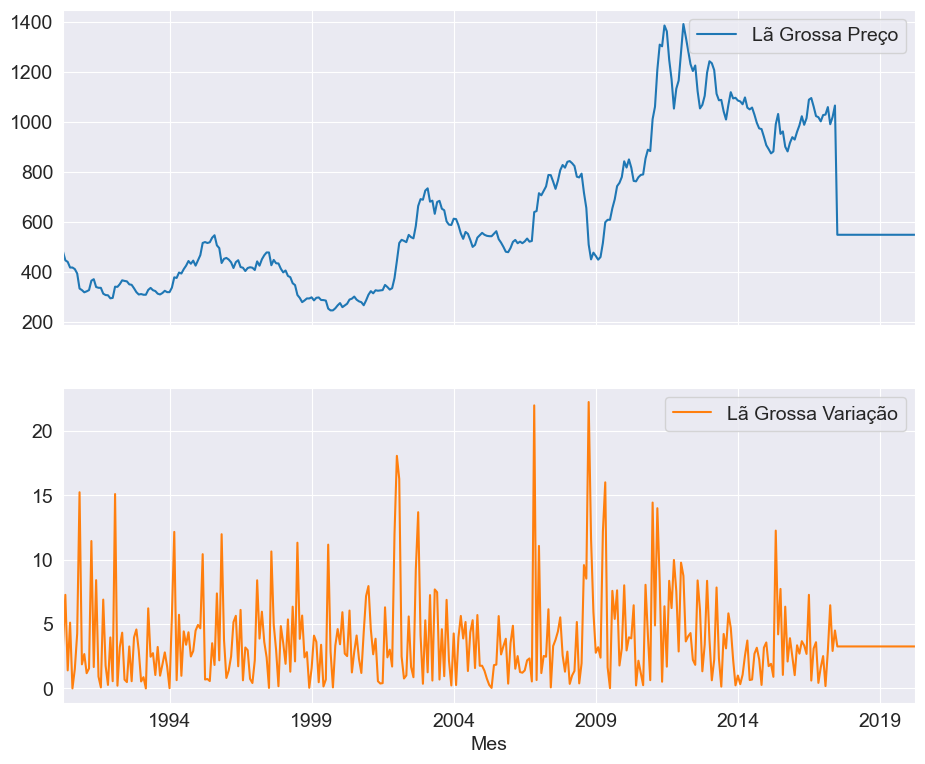

In [118]:
#Gráficos sobre a lã grossa

axes=df[["Lã Grossa Preço", "Lã Grossa Variação"]].plot(figsize=(11,9), subplots=True)


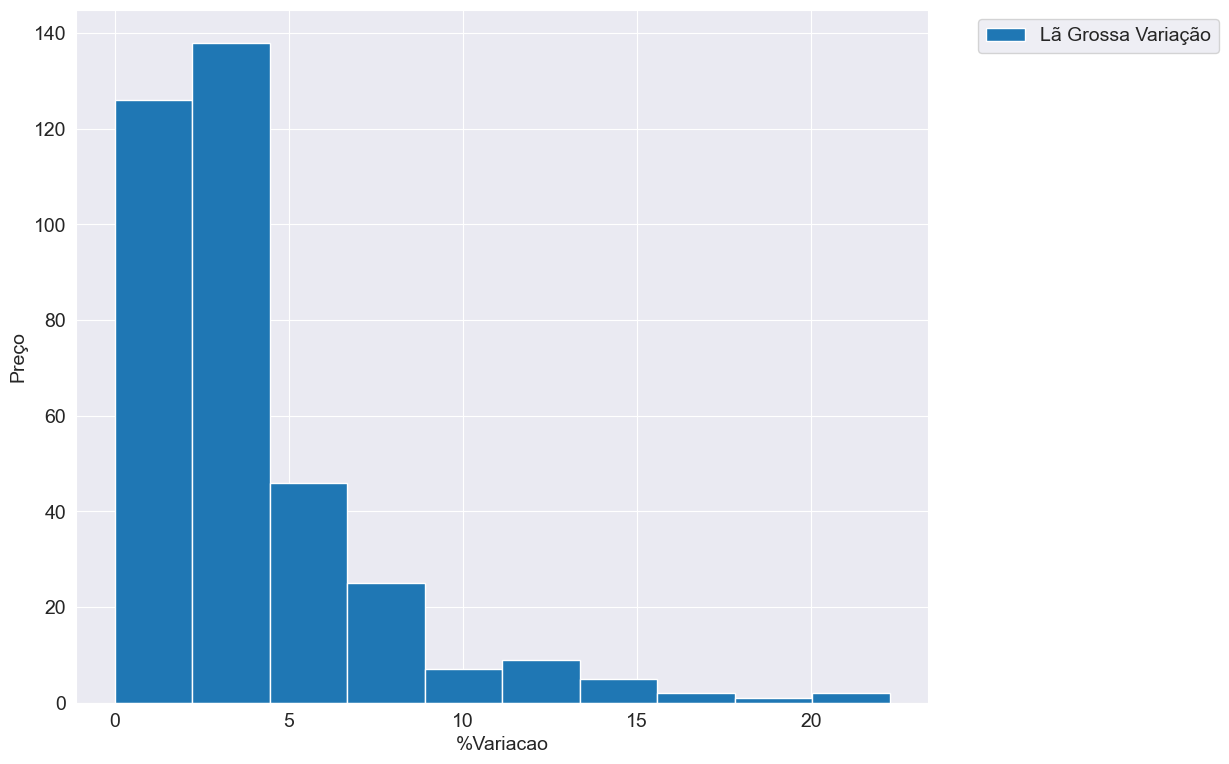

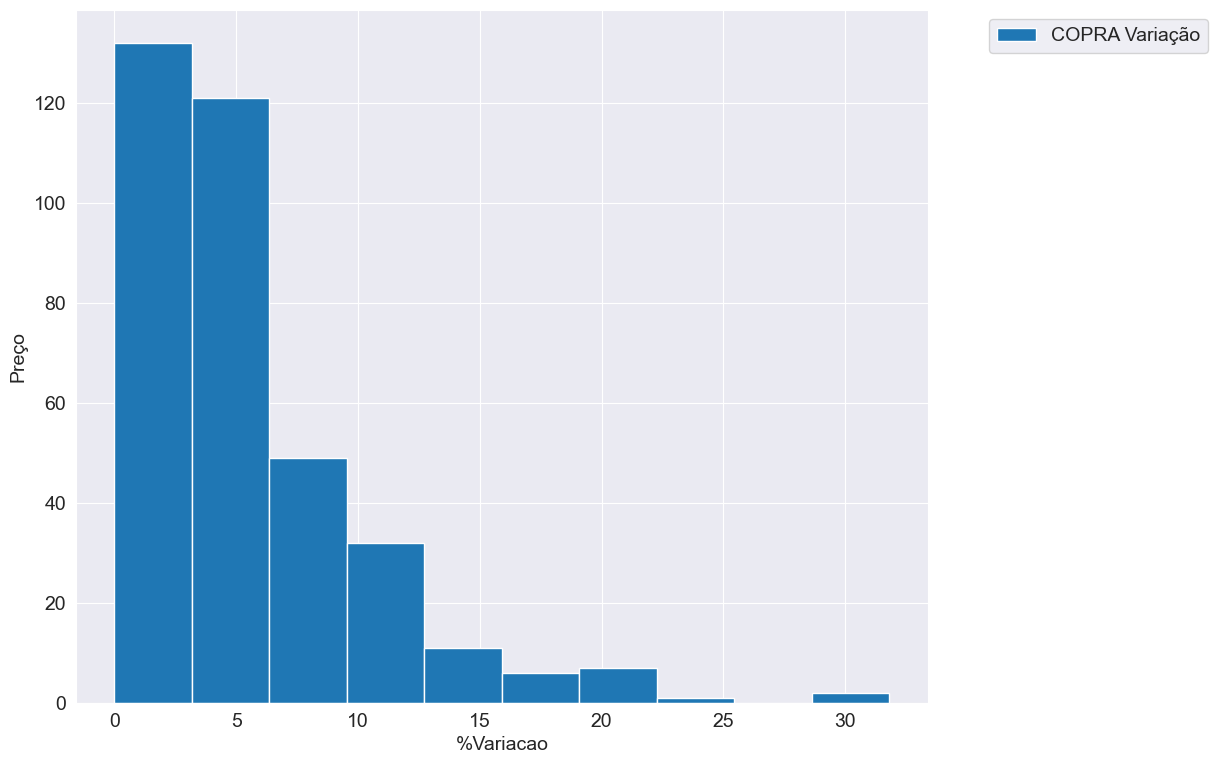

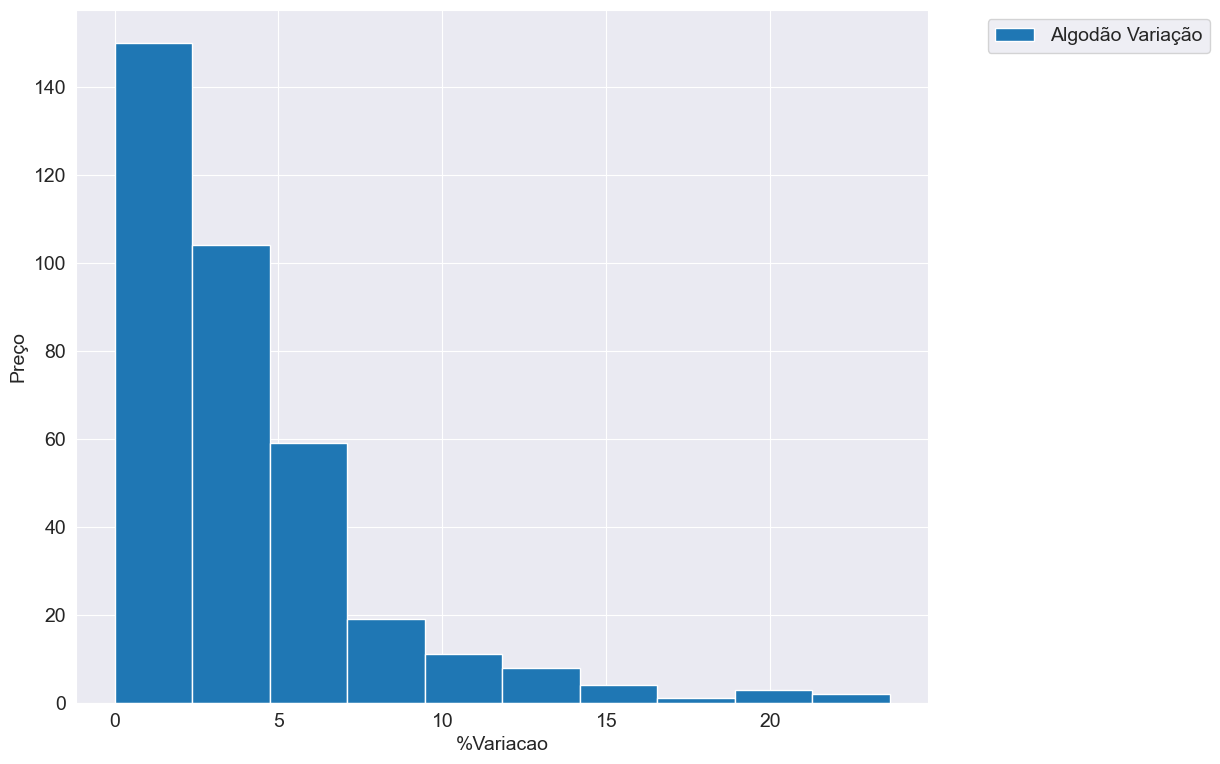

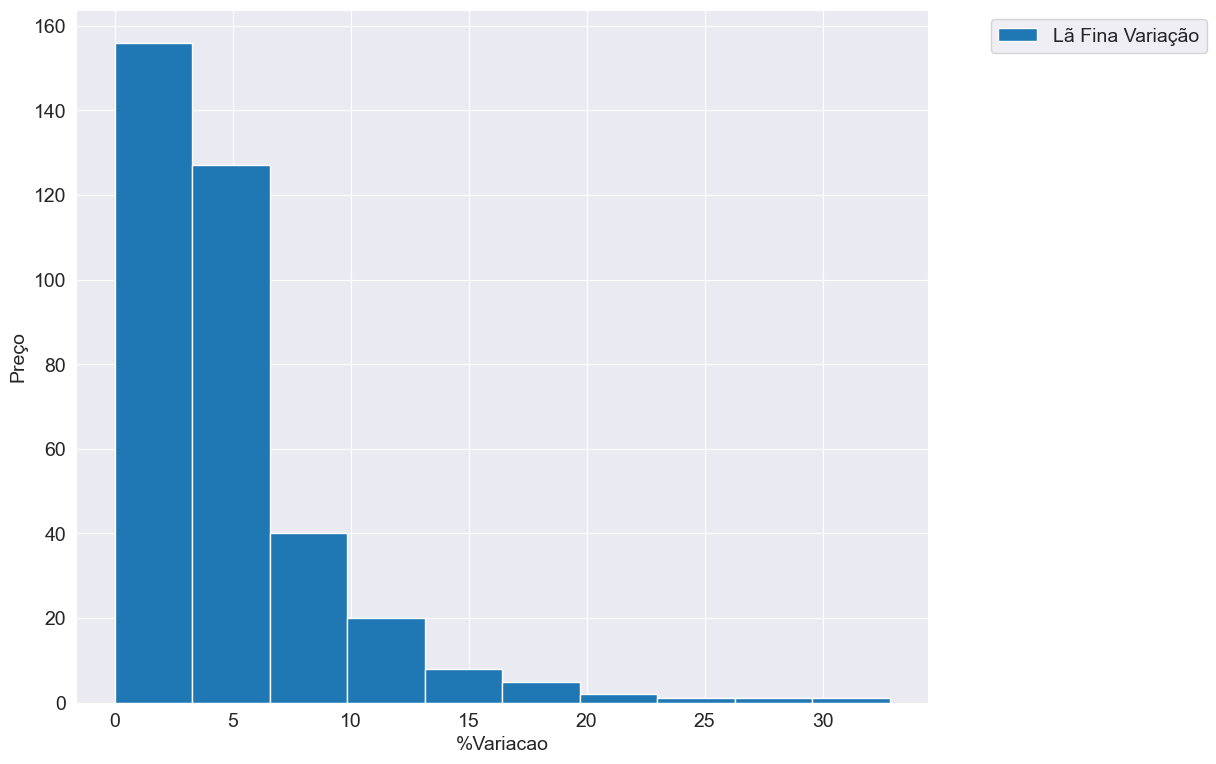

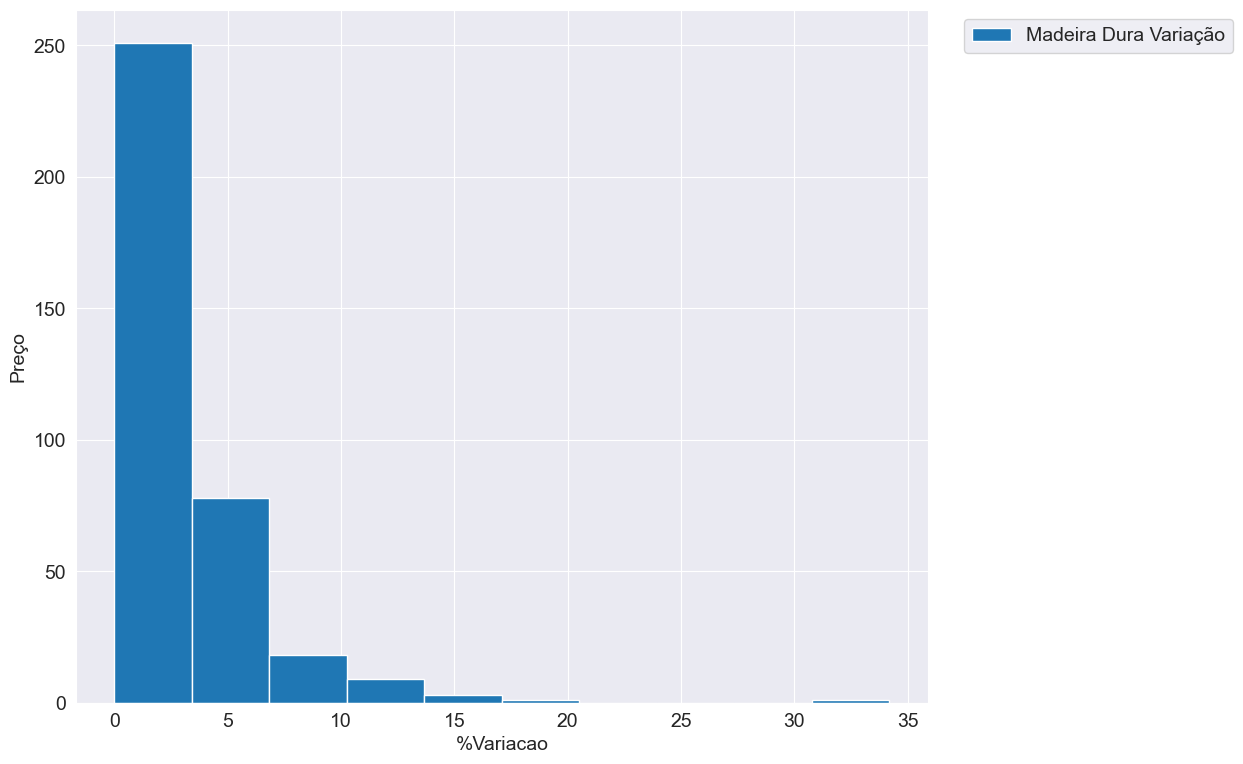

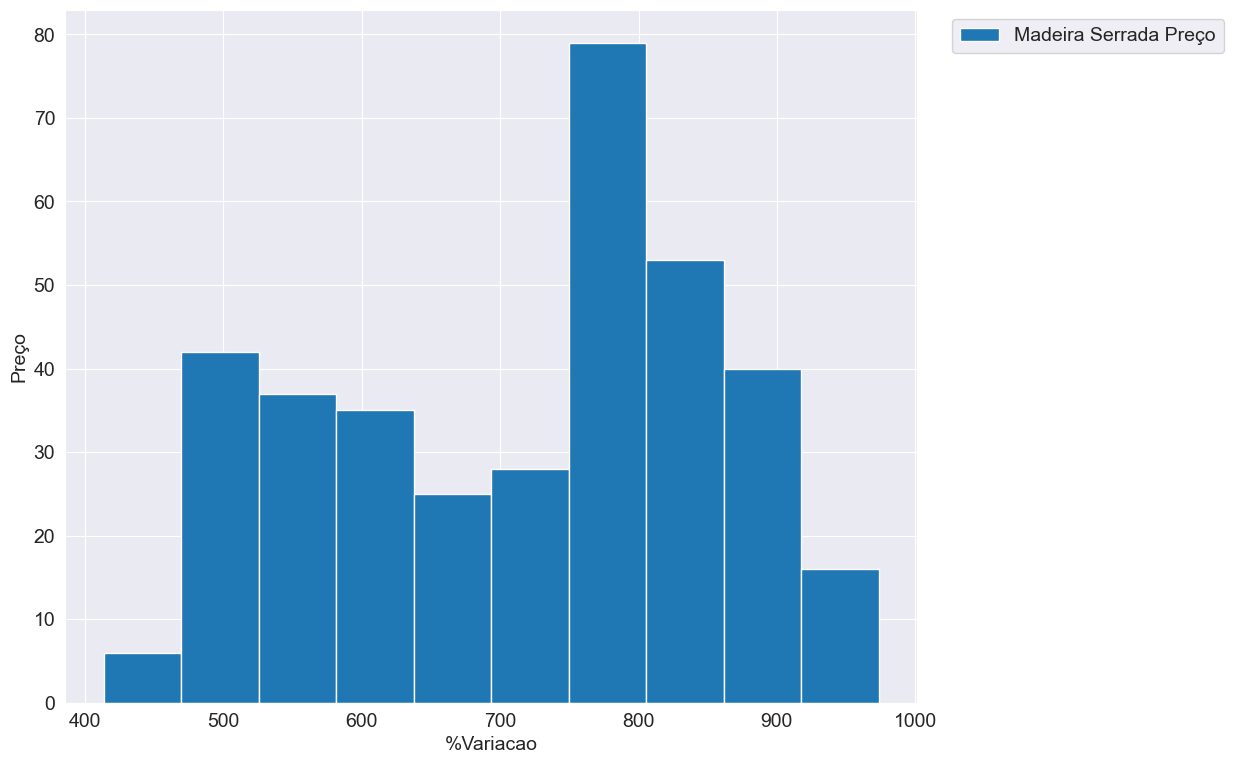

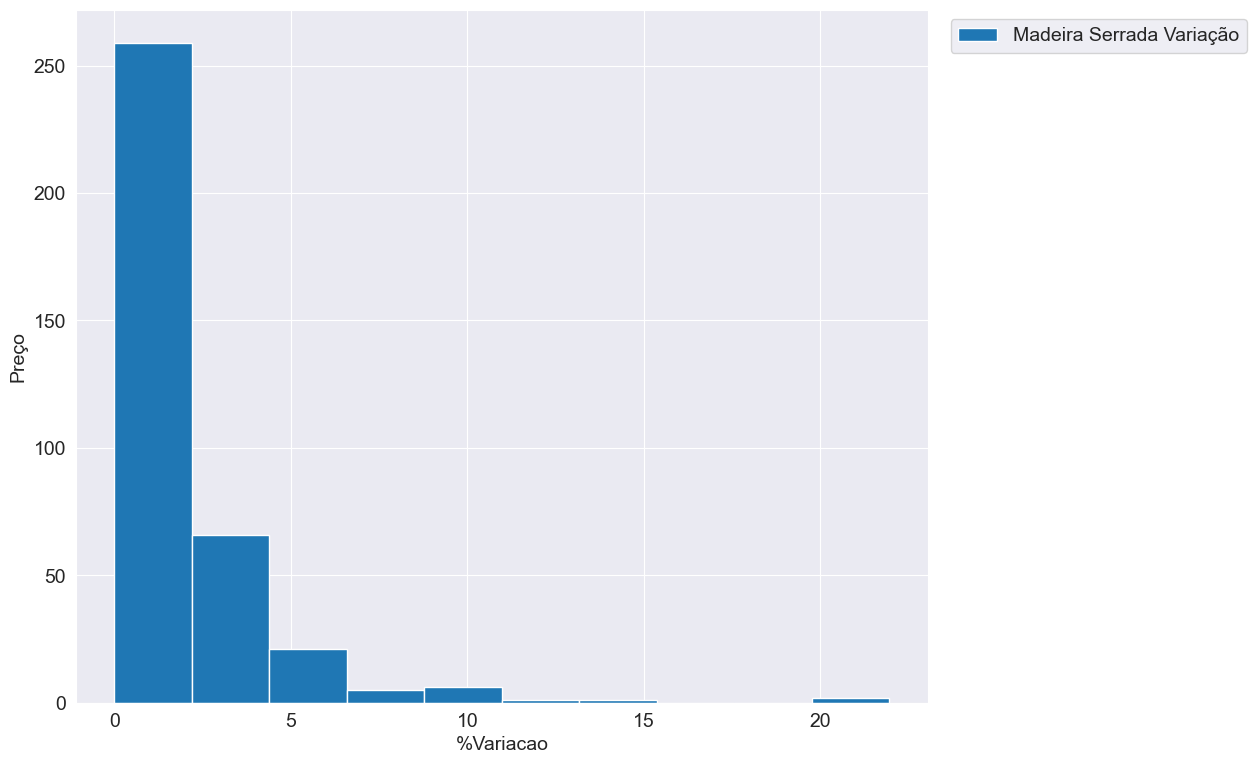

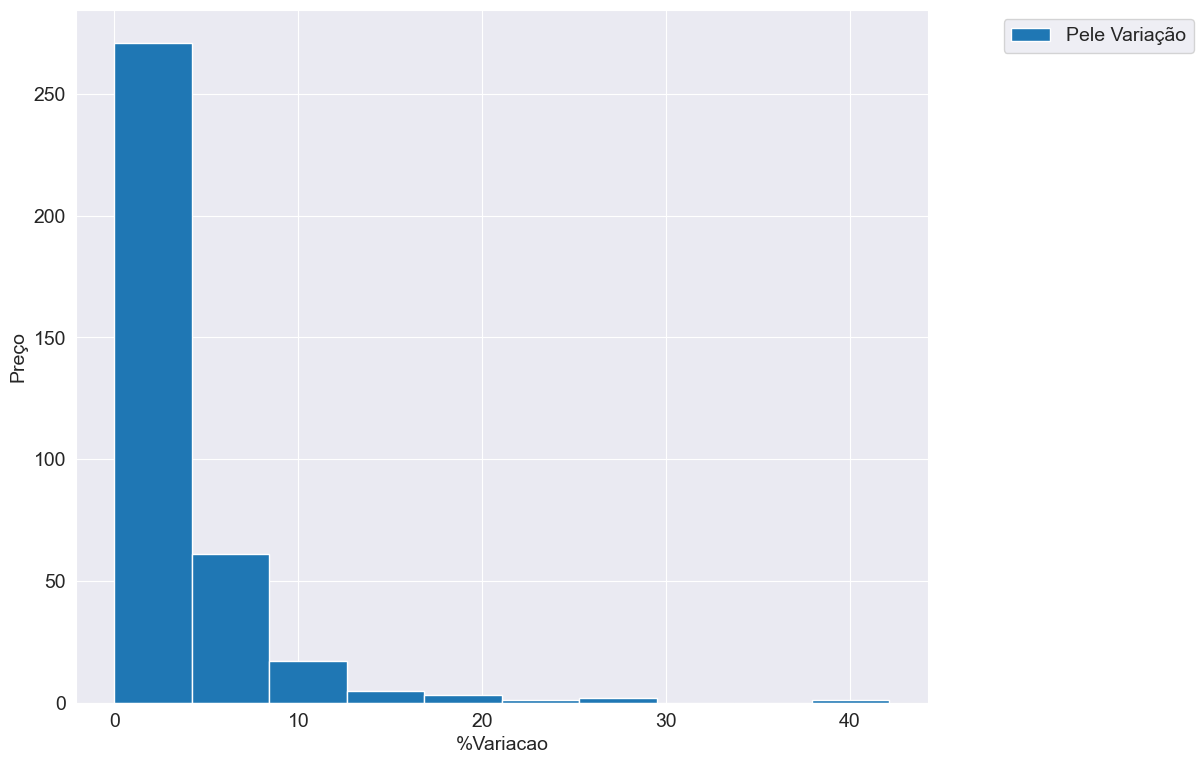

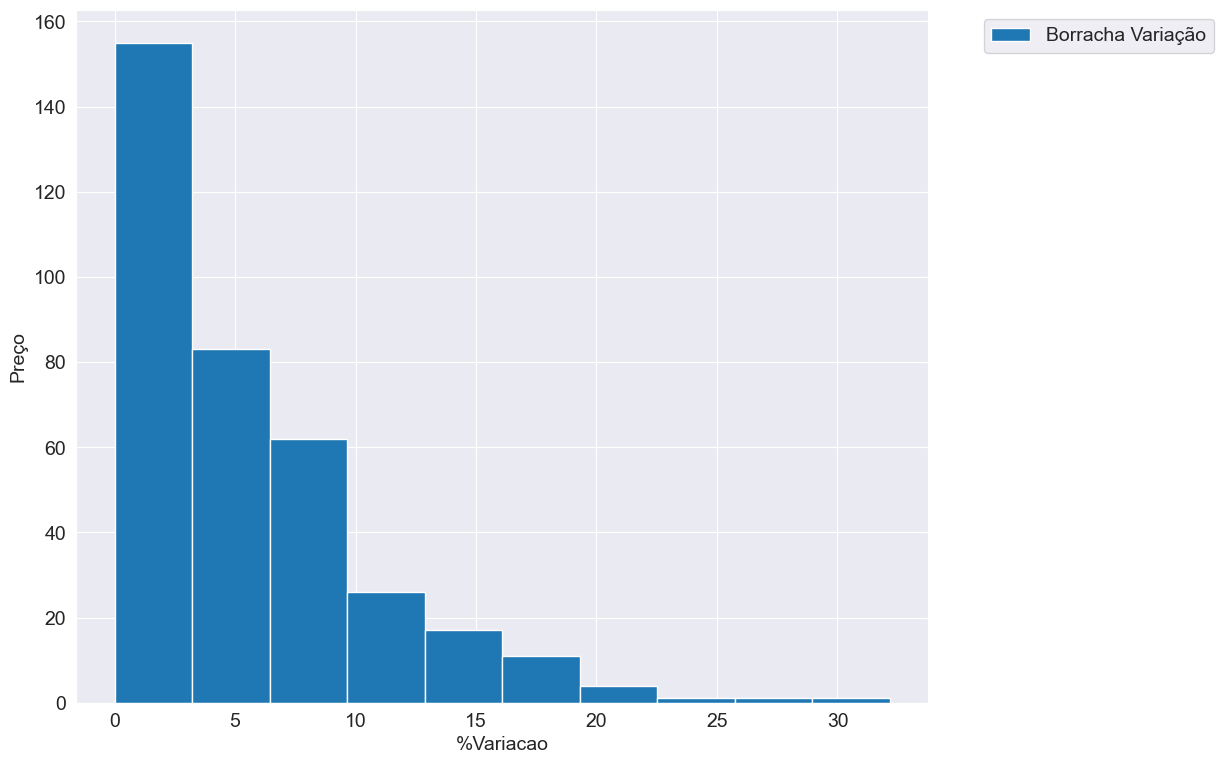

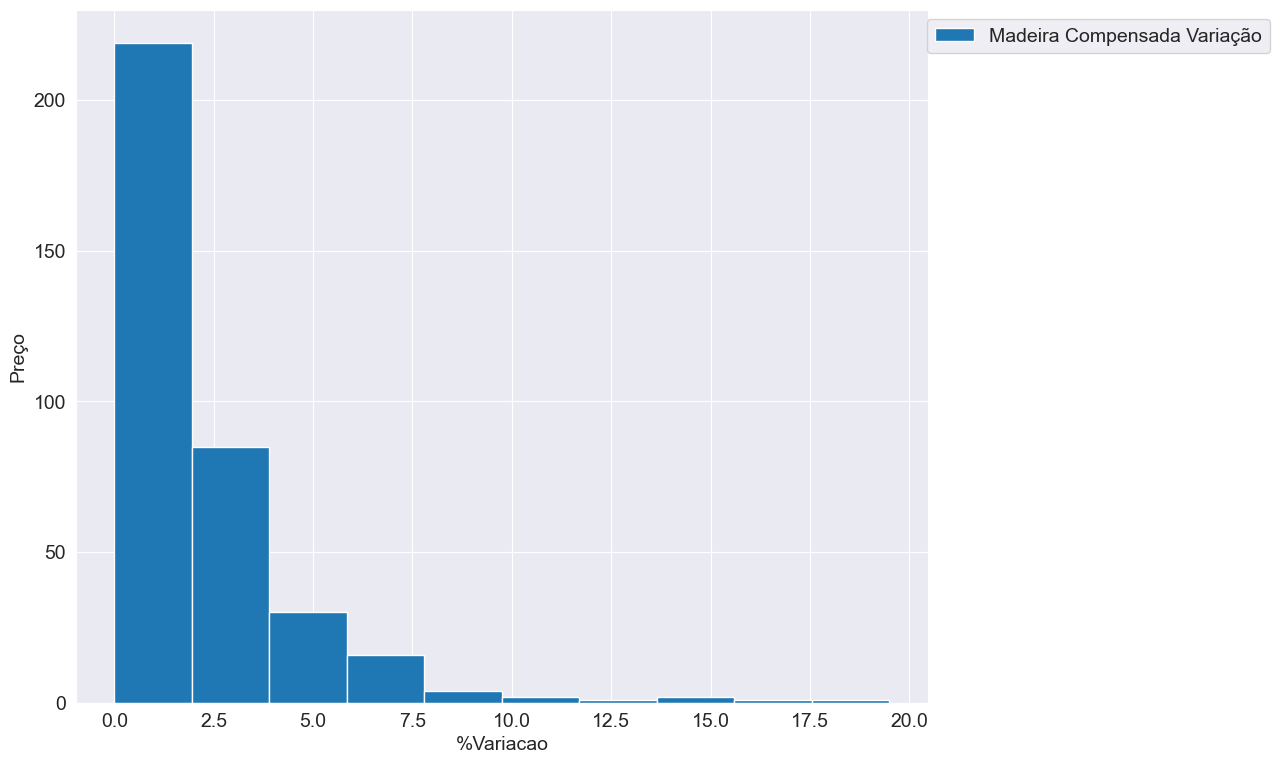

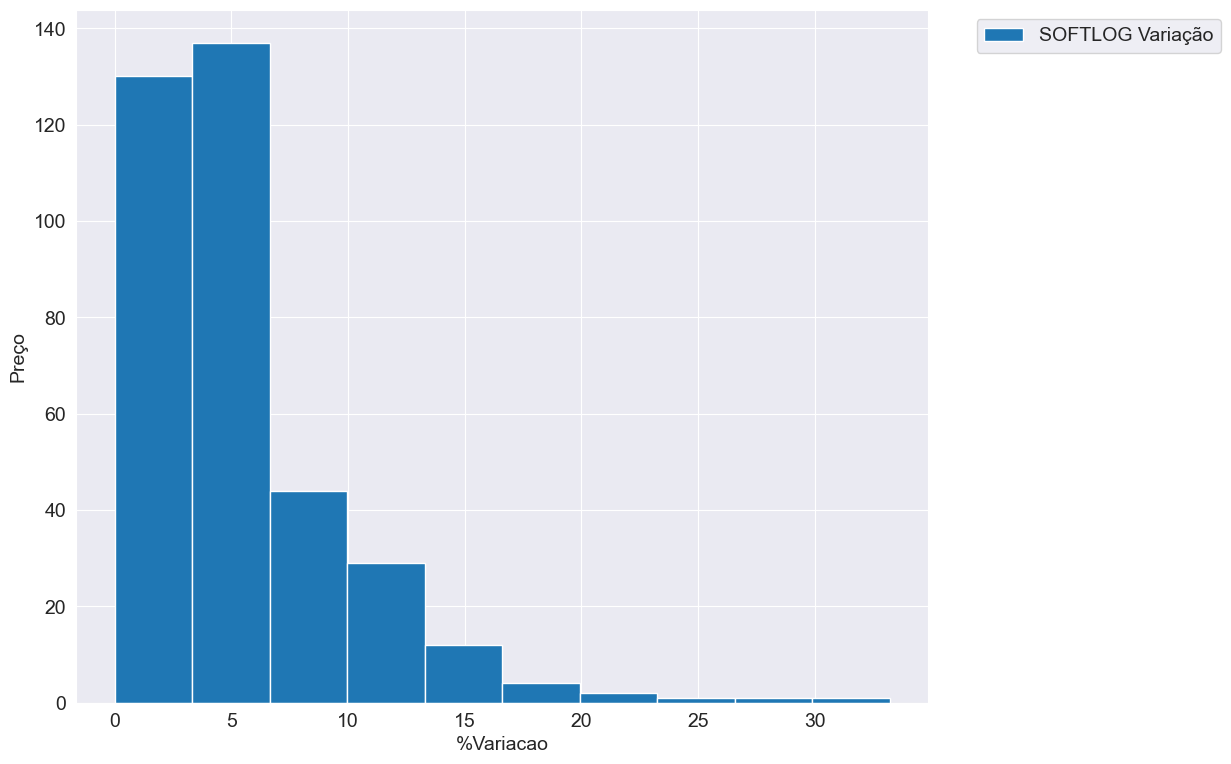

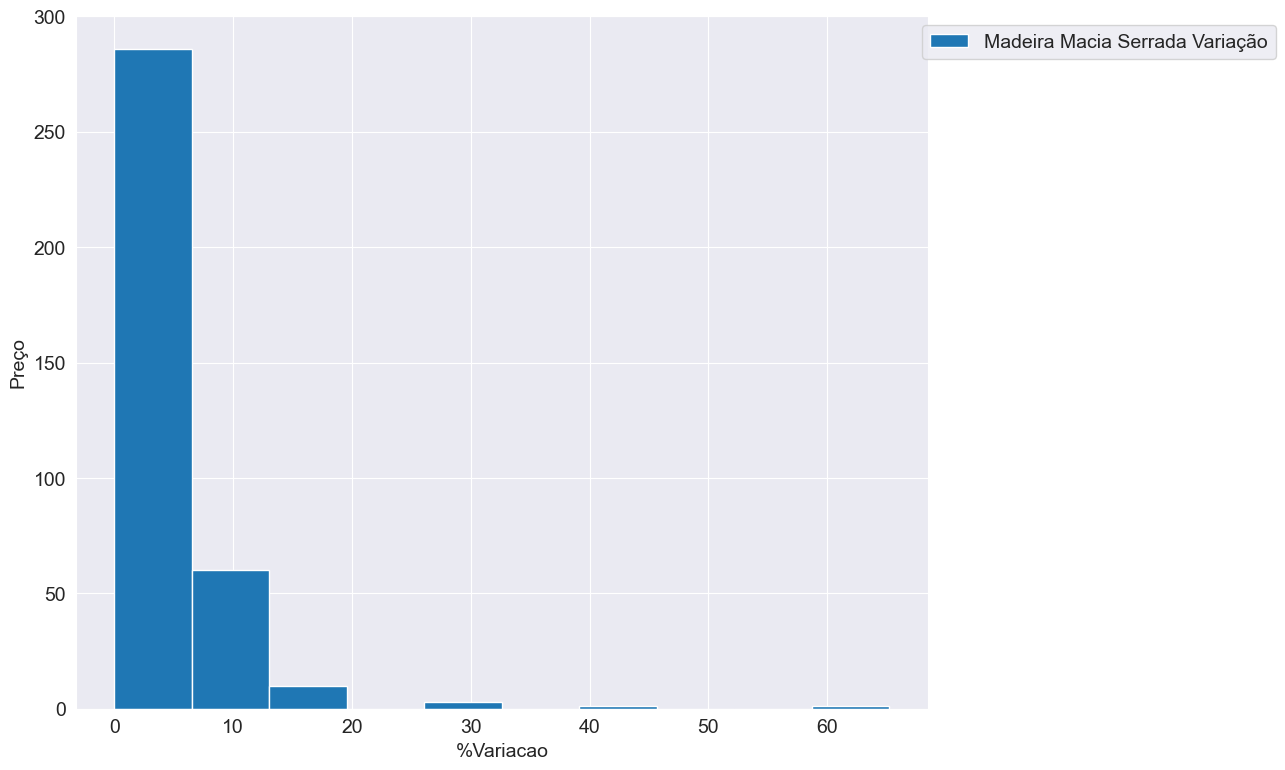

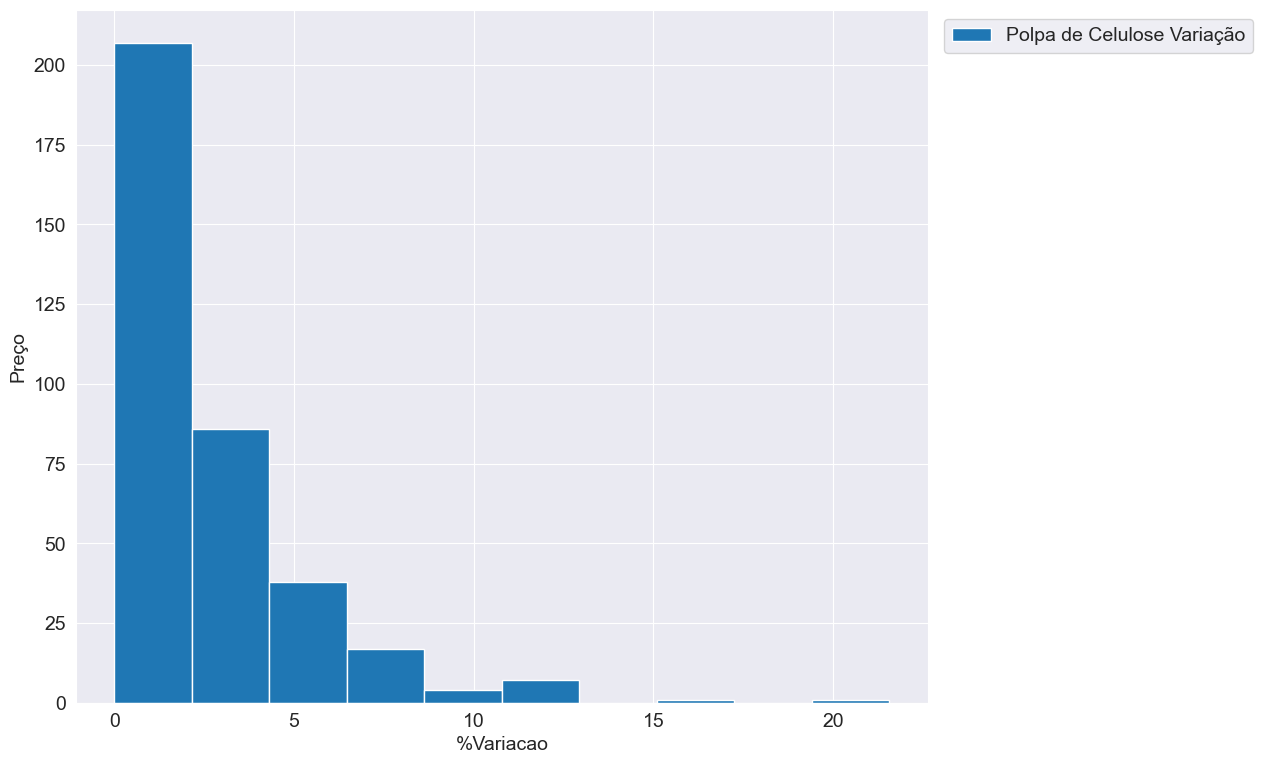

In [120]:


#Descobrindo a variação normal de cada matéria prima


variacaonormal = ["Lã Grossa Variação",
                  "COPRA Variação",
                  "Algodão Variação",
                  "Lã Fina Variação",
                  "Madeira Dura Variação",
                  "Madeira Serrada Preço",
                  "Madeira Serrada Variação",
                  "Pele Variação",
                  "Borracha Variação",
                  "Madeira Compensada Variação",
                  "SOFTLOG Variação",
                  "Madeira Macia Serrada Variação",
                  "Polpa de Celulose Variação"]
for i in range  (len(variacaonormal)):
    plt.figure(figsize=(12,12))
    df[variacaonormal[i]].hist(figsize=(11,9))
    plt.xlabel('%Variacao')
    plt.ylabel('Preço')
    plt.legend(variacaonormal[i:],loc='upper center',bbox_to_anchor=(1.2,1))

Text(0.5, 0.98, 'Comparação dos Preços do Materiais')

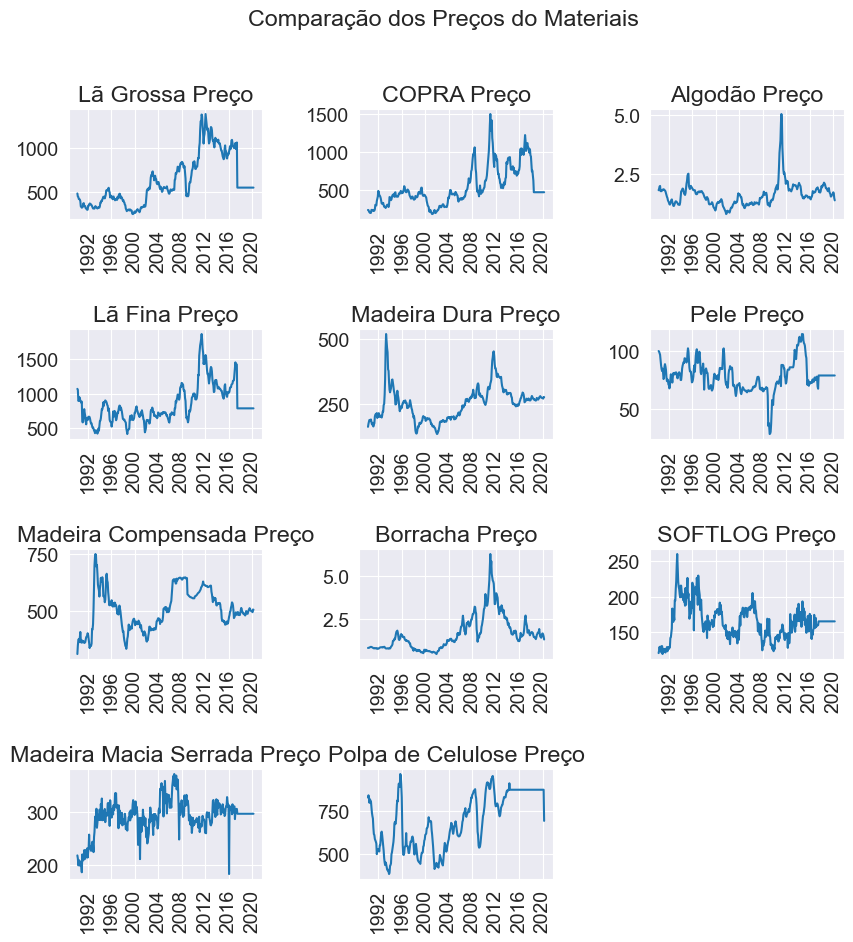

In [121]:
#Materia prima com menor preço

plt.figure(figsize=(10,10))
listamaterias=["Lã Grossa Preço",
               "COPRA Preço",
               "Algodão Preço",
               "Lã Fina Preço",
               "Madeira Dura Preço",
               "Pele Preço",
               "Madeira Compensada Preço",
               "Borracha Preço",
               "SOFTLOG Preço",
               "Madeira Macia Serrada Preço",
               "Polpa de Celulose Preço"]

for i in range (len(listamaterias)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace = 1, wspace=0.5)
    plt.title(listamaterias[i])
    plt.plot(df[listamaterias[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação dos Preços do Materiais")

In [132]:
plt.figure(figsize=(10,10))
plt.plot(df['Mes'], df['Algodão Preço'], label='Algodão Preço')
plt.plot(df['Anos'], df['Borracha Preço'], label='Borracha Preço')
plt.title("Comparação de Algodão e Borracha")
plt.xlabel('Anos')
plt.ylabel('Preços')
plt.legend(['Algodão Preço', 'Borracha Preço'], loc='upper center', bbox_to_anchor=(1.2,1))
plt.show()

KeyError: 'Mes'

<Figure size 1000x1000 with 0 Axes>